Домашнее задание: 
* Добиться вразумительного результата от модели, собранной на занятии (7 угаданныx картинок из 10 предложенных на семинаре). Варианты изменений:
        * изменение слоёв и их количества;
        * изменение метода оптимизации; 
        * изменение процесса обучения; 
        * для продвинутых: преобразование данных transform
* Переписать данный туториал на pytorch: https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ru


## 1) Добиться вразумительного результата от модели, собранной на занятии (7 угаданныx картинок из 10 предложенных на семинаре).

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn 
from torch import optim
import torch.nn.functional as F
import matplotlib.pyplot as plt ### воспользуемся для отображения изображения

In [2]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [3]:
train_dataset = torchvision.datasets.CIFAR10(root='data/',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=True)

Files already downloaded and verified


In [4]:
image, label = train_dataset[1]
print (image.size())
print (classes[label])

torch.Size([3, 32, 32])
truck


In [5]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [6]:
# Тестовый набор
test_dataset = torchvision.datasets.CIFAR10(root='data/', train=False,
                                       download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4,
                                         shuffle=False)

Files already downloaded and verified


Определим следующую модель:

In [7]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 3)
        self.pool = nn.MaxPool2d(2, 2)
#         self.dropout = nn.Dropout(p=0.05)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.conv3 = nn.Conv2d(16, 32, 3)
        self.fc1 = nn.Linear(32 * 2 * 2, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 84)
        self.fc4 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
#         x = self.dropout(x)
        x = self.pool(F.relu(self.conv2(x)))
#         x = self.dropout(x)
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 32 * 2 * 2)
#         print(x.size(0))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

net = Net().to(torch.device("cuda:0"))


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)



for epoch in range(20):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]
        inputs, labels = inputs.cuda(), labels.cuda()

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 299:    # print every 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

[1,   300] loss: 0.307
[1,   600] loss: 0.263
[2,   300] loss: 0.238
[2,   600] loss: 0.225
[3,   300] loss: 0.212
[3,   600] loss: 0.205
[4,   300] loss: 0.194
[4,   600] loss: 0.193
[5,   300] loss: 0.184
[5,   600] loss: 0.181
[6,   300] loss: 0.173
[6,   600] loss: 0.173
[7,   300] loss: 0.166
[7,   600] loss: 0.167
[8,   300] loss: 0.159
[8,   600] loss: 0.157
[9,   300] loss: 0.150
[9,   600] loss: 0.151
[10,   300] loss: 0.145
[10,   600] loss: 0.148
[11,   300] loss: 0.140
[11,   600] loss: 0.139
[12,   300] loss: 0.130
[12,   600] loss: 0.135
[13,   300] loss: 0.129
[13,   600] loss: 0.128
[14,   300] loss: 0.120
[14,   600] loss: 0.125
[15,   300] loss: 0.116
[15,   600] loss: 0.120
[16,   300] loss: 0.110
[16,   600] loss: 0.113
[17,   300] loss: 0.104
[17,   600] loss: 0.110
[18,   300] loss: 0.100
[18,   600] loss: 0.103
[19,   300] loss: 0.093
[19,   600] loss: 0.098
[20,   300] loss: 0.089
[20,   600] loss: 0.094
Training is finished!


#### Сохранение модели

In [8]:
PATH = 'cifar_net_version_test_intro.pth'
torch.save(net.state_dict(), PATH)

In [9]:
print("Model state_dict: ")
for param in net.state_dict():
    print(param," \ ", net.state_dict()[param].size())

Model state_dict: 
conv1.weight  \  torch.Size([6, 3, 3, 3])
conv1.bias  \  torch.Size([6])
conv2.weight  \  torch.Size([16, 6, 3, 3])
conv2.bias  \  torch.Size([16])
conv3.weight  \  torch.Size([32, 16, 3, 3])
conv3.bias  \  torch.Size([32])
fc1.weight  \  torch.Size([512, 128])
fc1.bias  \  torch.Size([512])
fc2.weight  \  torch.Size([256, 512])
fc2.bias  \  torch.Size([256])
fc3.weight  \  torch.Size([84, 256])
fc3.bias  \  torch.Size([84])
fc4.weight  \  torch.Size([10, 84])
fc4.bias  \  torch.Size([10])


#### Загрузка и использование модели 

In [10]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [11]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

GroundTruth:    cat  ship  ship plane


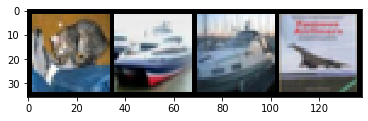

In [12]:
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [13]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car   car plane


In [14]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 63 %


Выводы: Программа угадывает 63% классов картинок

## 2) Переписать данный туториал на pytorch

In [15]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(128)
        self.dropout = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.softmax(self.fc2(x))
        return x